In [1]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from general_plot import *



model_name = model_name_list[2] # Simple: 
all_mutants = list_dir(join_path("merged_mutants", f'{system_map[model_name][0]}'))

print(all_mutants)



In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


['9', '3', '5', '0', '4', '7', '2', '8', '1', '6']


In [2]:
bes_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_loops.csv'))
rand_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_loops.csv'))

bes_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_no_loops.csv'))
rand_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_no_loops.csv'))

dfs = (bes_lo_k_csv, rand_lo_k_csv, bes_no_lo_k_csv, rand_no_lo_k_csv)

In [3]:
#calculate mutation score for each model = killed / all mutants
ms_bes_l = get_mutation_score(bes_lo_k_csv, all_mutants)
ms_rand_l = get_mutation_score(rand_lo_k_csv, all_mutants)
ms_bes_no_l = get_mutation_score(bes_no_lo_k_csv, all_mutants)
ms_rand_no_l = get_mutation_score(rand_no_lo_k_csv, all_mutants)

print(f'mutation score for bes_loop in model {model_name}: {ms_bes_l[1]} of {ms_bes_l[2]} = {ms_bes_l[0]*100}%')
print(f'mutation score for rand_loop in model {model_name}: {ms_rand_l[1]} of {ms_rand_l[2]} = {ms_rand_l[0]*100}%')
print(f'mutation score for bes_no_loop in model {model_name}: {ms_bes_no_l[1]} of {ms_bes_no_l[2]} = {ms_bes_no_l[0]*100}%')                    
print(f'mutation score for rand_no_loop in model {model_name}: {ms_rand_no_l[1]} of {ms_rand_no_l[2]} = {ms_rand_no_l[0]*100}%')




mutation score for bes_loop in model SimpleModel: 7 of 10 = 70.0%
mutation score for rand_loop in model SimpleModel: 7 of 10 = 70.0%
mutation score for bes_no_loop in model SimpleModel: 7 of 10 = 70.0%
mutation score for rand_no_loop in model SimpleModel: 7 of 10 = 70.0%


In [33]:
m_lists = get_killed_mutant_all(dfs)
(bes_m_l_list, rand_m_l_list, bes_m_no_l_list, rand_m_no_l_list) = m_lists 

d_map = {
    'bar_width' : 0.5, 
    'x_distance': 3,
    'fig_width' : 10,
    'fig_hight' : 5,
    'x_lim' : 20,
    'y_lim' : 8.5,
    
    'x_label': 'Killed mutant number', 
    'y_label': 'UnKnown', 
    'title': f"The different algorithms' performance on killed mutant for {model_name}",
    
    'bes_l_label': 'bes_loops',
    'random_l_label': 'random_loops',
    'bes_no_l_label': 'bes_no_self_loops',
    'random_no_l_label': 'random_no_self_loops' ,
    
    'model_name': model_name, 
    'comp_type' : "unknown"
    
    
}




labels: ['2', '3', '4', '5', '6', '7', '9']
bes_l data: [6, 6, 6, 6, 6, 5, 5]
rand_l data: [1, 2, 2, 2, 1, 2, 2]
bes_no_l data: [1, 1, 1, 1, 1, 6, 1]
rand_no_l data: [5, 2, 2, 1, 1, 1, 1]


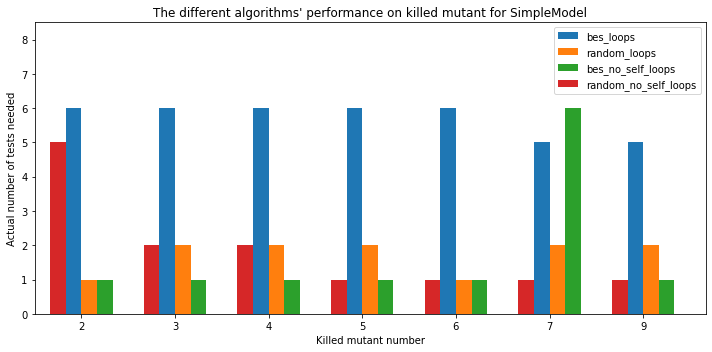

In [34]:

#################################
## Manually:
#################################

# actual_size

# desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[0]


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'actual_tests'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

d_map['y_label'] = "Actual number of tests needed"
d_map['comp_type'] = creteria

plot_4_bars(labels, c_lists, d_map)


labels: ['2', '3', '4', '5', '6', '7', '9']
bes_l data: [0.6163454055786133, 0.5666279792785645, 0.5664875507354736, 0.5666608810424805, 0.6165149211883545, 0.46730637550354, 0.6245379447937012]
rand_l data: [0.5657634735107422, 0.5155255794525146, 0.6158685684204102, 0.5158944129943848, 0.4656651020050049, 0.6669125556945801, 0.4660382270812988]
bes_no_l data: [0.5165872573852539, 0.5165131092071533, 0.5167305469512941, 0.5165796279907227, 0.5166838169097899, 0.5667533874511719, 0.5201797485351562]
rand_no_l data: [0.5161385536193848, 0.5159778594970703, 0.5161123275756836, 0.4658722877502442, 0.4660823345184326, 0.5162456035614014, 0.5665128231048584]


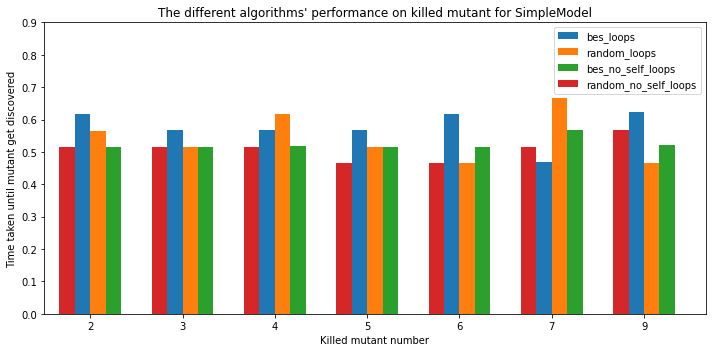

In [39]:
# time_requierd

desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[0]


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'time_taken'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
# d_map['x_lim'] = 
d_map['y_lim'] = 0.9

plot_4_bars(labels, c_lists, d_map)



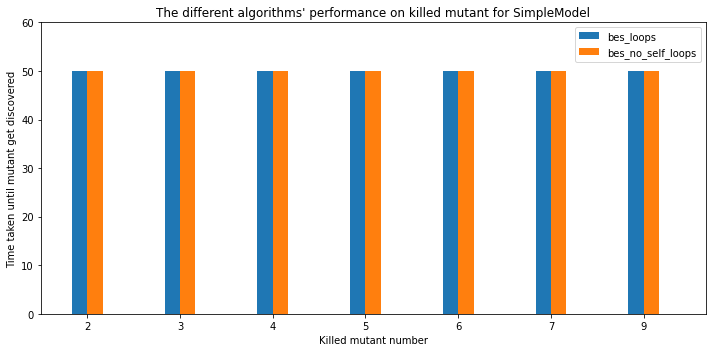

In [42]:
# depth
creteria = 'depth'
c_lists = get_cretiera_only_2(dfs, desired_mutants, creteria, 0)
(bes_lo_c, bes_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
#     'x_lim' : 25,
d_map['y_lim'] = 60


plot_2_bars(labels, c_lists, d_map)

